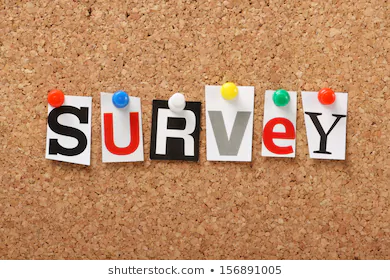

# Description

[2019 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2019/overview) is an industry wide survey conducted by **Kaggle** to analyze the state of Data Science and Machine learning. The survey received 19,717 responses from 171 countries between October 8th to October 28th, 2019.

   This Notebook is written to analyze the survey **question by question**, so that it acts as a guide to Beginners. The comprehensive analysis has insights that can help shape the path for beginners. This analysis will also give an overview of the state of Data Science currently.
   
   
   Note 1: This notebook is quite long and i advice you to jump to the section of your interest. Please donot forget to read the Introduction at the beginning!
   
   Note 2: Your Feedback will be of great help! Please provide your feedback at the comment section.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
import squarify 
plt.style.use('ggplot')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('../input/kaggle-survey-2019/multiple_choice_responses.csv',header=0,skiprows=[1])
text = pd.read_csv('../input/kaggle-survey-2019/other_text_responses.csv',header=0,skiprows=[1])
question = pd.read_csv('../input/kaggle-survey-2019/questions_only.csv') # This is the collection of questions
schema = pd.read_csv('../input/kaggle-survey-2019/survey_schema.csv',index_col=0,header=0,skiprows=[1],nrows=1)


## "Data is the new oil"

>    As any other field of science, Data science had its root when early human began to think. It carved its way out from other fields with the advent of computer and was powered by the growth in processors, storage and communication.
>   
  The essence of data science is building knowledge from data. In this survey we get an insight of Data Science and Machine Learning from the Data provided by those who work with data!

# Age


 Almost all surveys will have more younger populations. But this one had a surprisingly many fold . This is an indication of outcome of an emerging field, termed as the ['Sexiest Job of 21st century'](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century).
 There were 4458 kagglers in the age group 25-29 and only 100 kagglers in the age group of 100. (Here kaggler means those attended the survey.Number of kagglers is more than a million.

In [ ]:
data.Q1.value_counts().nlargest(1)

In [ ]:
data.Q1.value_counts().nsmallest(1)

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data.Q1.sort_values(),edgecolor='black',linewidth=0.5,palette="Blues")
plt.title('Age group of kagglers',fontsize=20)
plt.show()

# Gender

 There is a clear male dominance in the field. Out of every six respondants, five were men. 
 
 
 A kernel was written by Parul Pandey for analysis of female respondants [Geek Girls Rising:Myth or Reality!](https://www.kaggle.com/parulpandey/geek-girls-rising-myth-or-reality) 

In [ ]:
sns.countplot(data.Q2)
plt.title('Gender')
plt.show()
print(100*data.Q2.value_counts()/len(data.Q2),'%')

# Country

 There is a great responds from India and United States of America. One-fourth respondants are from India! 
 
 
 An interesting discussion on scope of Machine Learning in quora : [Scope of Machine Learning in India](https://www.quora.com/What-is-the-scope-of-machine-learning-in-India) 

In [ ]:
plt.figure(figsize=(15,4))
data.Q3[data.Q3.str[:14]=='United Kingdom']='UK'
data.Q3[data.Q3.str[:13]=='United States']='USA'

country_count = data.Q3.value_counts()
country_count.nlargest(10).plot(kind='barh')
plt.title('Country',fontsize=20)
plt.show()

print('Percentage responds from India',round(100*country_count['India']/19717,2),'%')
print('Percentage responds from United States',round(100*country_count['USA']/19717,2),'%')

> **INDIA** 
* In India, people in the age group of 18-21 seem to outperform others, which is different from the regular trend.The count seems to be strictly decreasing with age.
> * Though the gender ratio seems to be almost same, Indian women are more in numbers as the total Indians is also high. 
> * 18-21 Indian boys/men if were a seperate nation, they can claim the third. 18-21 Indian girls/Women if were a seperate nation will be within 20 places.

In [ ]:
India = data[data.Q3=='India'][['Q1','Q2','Q3','Q4']]
plt.figure(figsize=(15,7))
plt.subplot('121')
sns.lineplot(India.Q1.value_counts().index,India.Q1.value_counts()/len(India)*100,color='red',marker='o')
sns.lineplot(data.Q1.value_counts().index,data.Q1.value_counts()/len(data)*100,color='blue',marker='o')
plt.ylabel('Percentage respondents')
plt.title('Age group',fontsize =20)
plt.legend(['India','Whole World'])

plt.subplot('122')

labels = data.Q2.value_counts().index
x = np.arange(len(labels))
width = 0.3

plt.bar(x-width/2,data.Q2.value_counts()*100/len(data),width)
plt.bar(x+width/2,India.Q2.value_counts()*100/len(India),width)
plt.legend(['Whole World','India'])
plt.title('Gender',fontsize =20)
plt.ylabel('Percentage respondants')
plt.xticks(x,list(labels))

plt.suptitle('India vs Whole world',fontsize=25)
plt.show()
print(100*India.Q2.value_counts()/len(India.Q2))
plt.show()

In [ ]:
vals=pd.pivot_table(India,columns='Q2',index='Q1',values='Q3',aggfunc='count').fillna('0')
vals.drop(['45-49','50-54','55-59','60-69','70+'],inplace=True) #categories with least values are dropped for better visualization
vals.drop(columns=['Prefer not to say','Prefer to self-describe'],inplace=True)
fig,ax=plt.subplots(figsize=(10,10))
size=0.2
ax.pie(vals.sum(axis=1), radius=1,colors=['violet','indigo','b','g','y','orange'],labels=vals.index,
       wedgeprops=dict(width=size, edgecolor='w'))
in_=vals.values.flatten()
ax.pie(in_, radius=1-size,colors=['black','grey'],autopct=lambda x:'{:1.2f}%,({:1.0f})'.format(x,x*sum(in_)/100),
       wedgeprops=dict(width=size, edgecolor='w'))
plt.legend(loc='upper right')
plt.text(-0.18,-0.05,'INDIA',fontsize=36)
plt.text(-1,-1.2,'Note:Male(grey) and Female(black) in the age between 18 to 44 is considered for better visualization')
plt.show()

In [ ]:
#countries
print('Number of Countries having respondants more than Indian boys with 18-21 age:', sum(country_count > 1160))
print('Number of Countries having respondants more than Indian girls with 18-21 age:', sum(country_count > 227))

Tunishia is the country with highest ratio of female to male, while Norway is the least.

In [ ]:
male=data[data.Q2=='Male']
female=data[data.Q2=='Female']
female_male_ratio = female.Q3.value_counts()/male.Q3.value_counts()
fm_perct = round(female_male_ratio*100,2)
plt.figure(figsize=(15,7))

plt.subplot('121')
fm_perct.nlargest(10).plot(kind='bar',color='#12ff56')
plt.title('Large Female - Male Ratio')

plt.subplot('122')
fm_perct.nsmallest(10).plot(kind='bar',color='#ff2460')
plt.title('Lesser Female - Male Ratio')

plt.suptitle('Percentage Male to Female',fontsize=30)
plt.show()

# Edits: Some Functions

    Apart from the first three questions there were no responds for some questions so its better to group the question and 
    write some helper functions. There were three sets of questions:
    
    
    *  Single choice questions: One has to choose one from many.
    *  Multiple choice questions One can choose any number of choices or all choices. The question has other option, followed
    by text for those.
    *  Text: These questions expects text as responds

    Here some helper functions are written for single choice and multiple choice questions.
    Also we note that not all respondants responded to all questions. From Question 5 there is a decrease in count. So we
    will check the number of responds to each questions after 5. 

In [ ]:
plt.figure(figsize=(15,5))
schema.columns=pd.Series(schema.columns.str.replace('Q','')).apply(int)
schema=schema.T.sort_index()
plt.plot(schema.index,schema)
plt.plot(schema.index,schema,'ro')
plt.xlabel('Question Number')
plt.ylabel('Number of Respondents')
plt.title('Number of Respondents',fontsize=20)
del schema

In [ ]:
#Checking Number of respondent
def plot_responds(dat):
    """Check the number of Respondents"""
    plt.pie([sum(dat.notnull()),sum(dat.isnull())],labels=['','No response'],explode=[0,0.03],
            colors=['#12ff56','#ff5470'],shadow=True,autopct='%1.2f%%',radius=0.4)

def plot_single(dat,title,rot=0):
    """Plot the count for single choice question """
    if(len(dat.unique())<4):
        counts=dat.dropna().value_counts()
        fig=plt.pie(counts,autopct='%1.2f%%')
    elif len(dat.unique())<7:
        fig=sns.countplot(dat.sort_values(),palette = "GnBu_d",edgecolor='black',linewidth=0.3)
        fig.set_xticklabels(fig.get_xticklabels(),rotation=rot)
        plt.xlabel(title)
    else:
        fig=sns.countplot(y=dat.sort_values(),palette='GnBu_d',edgecolor='black',linewidth=0.3)
        fig.set_yticklabels(fig.get_yticklabels(),rotation=rot)
        plt.ylabel(title)
    plt.title(title,fontsize=20)
    
    
def plot_multi(QC1,QC2,title,data=data,c='#24bfff'):
    """Plot the count for multi choice question """
    counts=pd.Series()
    for col in data.columns[QC1:QC2+1]:
        key=data[col].dropna().unique()[0]
        counts[key] = sum(data[col].notnull())
        
    
    plt.barh(counts.index,counts,color=c)
    plt.title(title,fontsize=20)
    

# Educational qualification

 Respondents with Masters degree are more in number compared with the others followed by a bachelor degree.This provoked me to know more about these master degree holders. More masters are from India followed by USA, but this is not as the whole of respondents. The gap between both countries seemed to be very less with masters. When it comes to doctoral USA dominates strongly.
 
 There were some master degree holders in 18-21 range. How do these people get their masters so soon? Actually the question has two parts 'highest qualification attained or planned to attain in 2 years'. May be they are students. Nevertheless the trend remains like, youth dominates. When we move from masters to Doctoral there is a decrease in count as well as shift in age towards right.
 
 

In [ ]:
question.iloc[0,4]

In [ ]:
data.Q4[data.Q4.str[:4]=='Some']='Some College'
data.Q4[data.Q4.str[:9]=='No formal']='High School' #processing for text
plot_single(data.Q4,'Educational Qualification')
plt.title('Education')
plt.show()

In [ ]:
Masters = data[data.Q4.str[:6]=="Master"]
Doc = data[data.Q4.str[:8]=='Doctoral']
plt.figure(figsize=(15,10))

plt.subplot('221')
sns.countplot(Masters.Q1.sort_values())
plt.xlabel('Age group')
plt.ylabel('Master degree holders')
plt.title('Master - Age')

plt.subplot('222')
Masters.Q3.value_counts().nlargest(10).plot('barh')
plt.xlabel('Number of Masters')
plt.title('Master -Country')

plt.subplot('223')
sns.countplot(Doc.Q1.sort_values())
plt.xlabel('Age group')
plt.ylabel('Doctoral degree holders')
plt.title('Doctoral - Age')

plt.subplot('224')
Doc.Q3.value_counts().nlargest(10).plot('barh')
plt.xlabel('Number of Doctorals')
plt.title('Doctoral - Country')

plt.suptitle('Educational Qualification',fontsize=25)
plt.show()

# Designation 
 


Majority of the respondents were Data Scientists and students. Data Scientists and Students have varied educational qualification. Most Data Scientists have Masters degree and doctoral. Most students have  Bachelor degree. 

Third most respondents were software engineers who are mostly from India.

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot('121')
plot_responds(data.Q5)

plt.subplot('122')
plot_single(data.Q5,'Designation')
plt.suptitle('Designation',fontsize=20)
plt.show()

In [ ]:
print('Total Data Scientists:',sum(data.Q5=='Data Scientist'))

print()

print('Total Students:',sum(data.Q5=='Student'))
plt.figure(figsize=(15,5))
plt.subplot('121')
students=data[data.Q5=='Student']
s1=students.Q4.value_counts().sort_index()
s1.index=pd.Series(s1.index).apply(lambda x:str(x).split(' ')[0])
squarify.plot(s1,label=s1.index,alpha=.7,color=['violet','indigo','b','g','y','orange','r'])
plt.title('Students',fontsize=20)

plt.subplot('122')
data_scientist=data[data.Q5=='Data Scientist']
s2=data_scientist.Q4.value_counts().sort_index()
s2.index=pd.Series(s2.index).apply(lambda x:str(x).split(' ')[0])
squarify.plot(s2,label=s2.index,alpha=.7,color=['violet','indigo','b','g','y','orange','r'])
plt.title('Data Scientist',fontsize=20)


plt.show()
del s1,s2

In [ ]:
plt.figure(figsize=(15,4))
software=data[data.Q5=='Software Engineer']
soft_perct=software.Q3.value_counts().nlargest(6).div(len(software)).mul(100)
soft_perct.plot(kind='barh',color=['#fe1534','pink','pink','pink','pink','pink'])
plt.title('Software Engineer Location',fontsize=20)
plt.show()

# Number of employees
 More than one-fourth hasn't answered for the number of employees they have. And the curve appeared to be inverted u. Either they are more probably in a less populated company or more populated company. While most were from companies with 0-49 employees. The trend is different for research scientists who are equally distributed in all type of companies and Statisticians are more in companies with less employees than with more employees. 

In [ ]:
#getting lower limit
def clean_employee(emp):
    """String formating for number of employees"""
    emp=str(emp).replace('>','').replace('employees','')
    emp=emp.split('-')[0].strip()
    return int(''.join(emp.split(',')))


plt.figure(figsize=(15,4))
plt.subplot('121')
plot_responds(data.Q6)
plt.subplot('122')

no_emp = data.Q6.dropna().apply(clean_employee)
plot_single(no_emp,'Employee count')


plt.suptitle('Number of employees')
plt.show()

In [ ]:
def plot_pivot(df):
    """visualizing a pivoted table"""
    data=pd.DataFrame()
    for col in df.columns:
        for ind in df.index:
            row=pd.Series([col,ind,df.loc[ind,col]]) #storing x,y,value at x,y
            data=pd.concat([data,row],axis=1)
    data = data.T
    data.columns = [df.columns.name,df.index.name,'count']
    plot=plt.scatter(data.iloc[:,0],data.iloc[:,1],c=data['count'],s=2500,\
                     cmap='rainbow',edgecolor='white',linewidth=1.5)
    #with size=2000 and colored based on value
    plt.colorbar(plot)
    for x,y in data.iterrows():
        plt.annotate(y[2],(y[0],y[1]),color='black')
pv=data.pivot_table(columns='Q6',index='Q5',values='Q1',aggfunc='count')
plt.figure(figsize=(12,12))
plot_pivot(pv) #One can also use heat map at this place
plt.xlabel('Number of Employees')
plt.title('Number of Employees and their designations')
plt.ylabel('')
plt.show()



# Number of employees working in Data Science
  The last three question can be used to know about company structure. We could not make ratio of employees dealing with datascience to the other as the informations are in bucketized columns. From this question, we see that smaller companies(0-49) have lesser personnel with data science portfolio, while large company have more such people. There are also few companies with 20+ data science works out of less than 49 employees. 
  
  Many software engineers says that their company has very few or no profile in data science. These companies may be having analytics service from other companies or these software engineers are from same company.
  


In [ ]:
def clean_data_sci(datasci):
    datasci=str(datasci).split('-')[0].replace('+','')
    return int(datasci)


plt.figure(figsize=(15,5))
plt.subplot('121')
plot_responds(data.Q7)
plt.subplot('122')

no_emp = data.Q7.dropna().apply(clean_data_sci)
sns.countplot(no_emp)
plt.xlabel('Personels employed for Data Science - Lower bound')
plt.title('Counts')

plt.suptitle('Number of Data Science professionals in a company',fontsize=20)
plt.show()

In [ ]:
pv=data.pivot_table(columns='Q6',index='Q7',values='Q1',aggfunc='count')
plt.figure(figsize=(14,10))
plot_pivot(pv)
plt.title('Number of Data Science professional vs total employees')
plt.ylabel('')
plt.show()

In [ ]:
pv=data.pivot_table(columns='Q7',index='Q5',values='Q1',aggfunc='count')
plt.figure(figsize=(12,12))
plot_pivot(pv)
plt.title('Number of Data Science professional vs respondent\'s designation')
plt.ylabel('')
plt.show()

# ML in your company?
  When asked how long it has been since your company has implemented ML, one-third skipped the question. Some did not know, some haven't started,some finding insights. Companies with established ML are less than one_fifth!
  
  It is so funny that few data scientist did not know whether ML is implemented or not.

In [ ]:
data.Q8.value_counts().plot(kind='barh')
plt.show()

In [ ]:
plot_responds(data.Q8)
plt.title('Response')
plt.show()

In [ ]:
pv=data.pivot_table(columns='Q5',index='Q8',values='Q1',aggfunc='count')
plt.figure(figsize=(14,14))
plot_pivot(pv)
plt.title('ML implementation vs respondent\'s designation')
plt.ylabel('')
plt.show()

# What is your role?
 Any work role and designations are not fixed. One data scientist may be forced to build infrastructure, which is said to be the work of data engineer and other may be working on DMS. We can anlayse the role of data scientist and get to know what is their routine. 
 
 From the answers most respondents do data analysis and build data prototypes. When analysed the role of Data Scientist, we find no difference!

In [ ]:
activities=pd.Series()
activities['Data Analysis'] = sum(data.Q9_Part_1.notnull())
activities['Build Data Infrastructure'] = sum(data.Q9_Part_2.notnull())
activities['Build prototypes'] = sum(data.Q9_Part_3.notnull())
activities['Build ML'] = sum(data.Q9_Part_4.notnull())
activities['Improving ML'] = sum(data.Q9_Part_5.notnull())
activities['Reserach'] = sum(data.Q9_Part_6.notnull())
activities['None'] = sum(data.Q9_Part_7.notnull())
activities['Other'] = sum(data.Q9_Part_8.notnull())

In [ ]:

activities_=pd.Series()
activities_['Data Analysis'] = sum(data_scientist.Q9_Part_1.notnull())
activities_['Build Data Infrastructure'] = sum(data_scientist.Q9_Part_2.notnull())
activities_['Build prototypes'] = sum(data_scientist.Q9_Part_3.notnull())
activities_['Build ML'] = sum(data_scientist.Q9_Part_4.notnull())
activities_['Improving ML'] = sum(data_scientist.Q9_Part_5.notnull())
activities_['Reserach'] = sum(data_scientist.Q9_Part_6.notnull())
activities_['None'] = sum(data_scientist.Q9_Part_7.notnull())
activities_['Other'] = sum(data_scientist.Q9_Part_8.notnull())

plt.figure(figsize=(15,7))
plt.subplot('121')
plt.barh(activities.index,activities)
plt.title('General activities',fontsize=20)

plt.subplot('122')
plt.barh(activities_.index,activities_)
plt.title('Data scientist activities',fontsize=20)
plt.ylabel(None)
plt.show()

# Salary
   Also the main reason for spike in Data Science.Interestingly no student answered this question.  Also 40% skipped this question!. Nevertheless from the answers received we see most have a salary less than 1000 USDs. Most Data scientists are also offered less than 1000 USDs but still overall they have a descent pay than the rest. 
 
 We can look for location than job designation for better insights. India looks similar to general trend on its own scale, but very few or no one at low salary and is more than the general when it comes to number of people with salary higher than that in general data.
 
 Data Scientist with less than 1000 USD salary (marked as 0 - lower limit) is quiet shocking.. When looking their age distribution it was similar to the general trend. They were mostly from India as (31%) little similar to the general trend (24% Indians), but USA do not have large number of low paid data scientist! The size of the company affects the salary of Data scientist. 218 out of 379 data scientist was working in smaller companies.

In [ ]:
def clean_salary(sal):
    strTemp = str(sal).split('-')[0]
    if not strTemp[0].isnumeric():
        strTemp =strTemp[1:]
    strTemp=strTemp.replace('$','').replace(' (USD)','')
    cleaned = int(''.join(strTemp.split(',')))
    return cleaned

plt.figure(figsize=(20,10))
plt.subplot('141')
plot_responds(data.Q10)

plt.subplot('142')
salary = data.Q10.dropna().apply(clean_salary)
sns.countplot(y=salary,palette='RdYlGn',linewidth=0.3, edgecolor='black')
plt.title('Overall Salary')

plt.subplot('143')
salary_ds = data_scientist.Q10.dropna().apply(clean_salary)
sns.countplot(y=salary_ds,palette='RdYlGn',linewidth=0.3, edgecolor='black')
plt.title('Data scientist Salary')

print('Total number of students answered:',sum(students.Q10.notnull()))
# also check here 
#print(sum(data[data.Q5=='Student'].Q10.notnull()))

plt.subplot('144')
salary_youth = data[data.Q1=='18-21'].Q10.dropna().apply(clean_salary)
sns.countplot(y=salary_youth,palette='RdYlGn',linewidth=0.3, edgecolor='black')
plt.title('Salary of 18-21 age group')

plt.show()

In [ ]:
India=data[data.Q3=='India']
USA=data[data.Q3=='USA']

sal_ind = India.Q10.dropna().apply(clean_salary)
sal_USA = USA.Q10.dropna().apply(clean_salary)

plt.figure(figsize=(15,5))
plt.plot(salary.value_counts().index,salary.value_counts(),'ro')
plt.plot(sal_ind.value_counts().index,sal_ind.value_counts(),'gX')
plt.plot(sal_USA.value_counts().index,sal_USA.value_counts(),'bD')
plt.legend(['General','India','USA'])
plt.title('Salary in India vs US vs all')
plt.xlabel('Salary (in USD)')
plt.show()

In [ ]:
# Data scientiat with salary equal to 0-999 are chosen as DS_Sal_low 
DS_Sal_low_index=salary_ds[salary_ds==0].index
DS_Sal_low=data.loc[DS_Sal_low_index]

plt.figure(figsize=(20,12))

plt.subplot('221')
plot_single(DS_Sal_low.Q1,'Age Group')

plt.subplot('222')
(DS_Sal_low.Q3.value_counts()/len(DS_Sal_low)).mul(100).nlargest(10).plot(kind='barh')
plt.title("Countries",fontsize=20)
plt.xlabel('Percentage distribution of countries')

# Indian Data Scientists with low salary
Ind_DS_Sal_low=DS_Sal_low[DS_Sal_low.Q3=='India']

plt.subplot('223')
plot_single(DS_Sal_low.Q6,' No. of employees in Companies with Data Scientist receiving lower salary')

plt.subplot('224')
plot_single(data.Q6,'Number of employees overall')


plt.suptitle("Data Scientists with salary of $ 0-999",fontsize=40)
plt.show()
print('Data Scientist with low salary working in smaller companies(0-49):',sum(DS_Sal_low.Q6=='0-49 employees'))
print('Total Data Scientist with low salary:',len(DS_Sal_low))

# Expenditure

  How much does your company spend on Machine Learning and cloud? Generally very less money is spent on ML and cloud. USA has more companies spending more. India follows a regular trend.

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot('121')
plot_responds(data.Q10)
plt.subplot('122')

expend_ML_cloud = data.Q11.dropna().apply(clean_salary)
sns.countplot(expend_ML_cloud,palette='Blues',linewidth=0.5,edgecolor='black')
plt.title('Companies count')
plt.suptitle('Expenditure on ML ',fontsize=25)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot('121')
expend_ML_cloud = USA.Q11.dropna().apply(clean_salary)
sns.countplot(expend_ML_cloud,palette='Blues',linewidth=0.5,edgecolor='black')
plt.title('USA Companies count')
plt.xlabel('Expenditure lower bound(in USD)')

plt.subplot('122')
expend_ML_cloud = India.Q11.dropna().apply(clean_salary)
sns.countplot(expend_ML_cloud,palette='Blues',linewidth=0.5,edgecolor='black')
plt.title('India Companies count')
plt.xlabel('Expenditure lower bound(in USD)')

plt.suptitle('Expenditure on ML & CLoud',fontsize=20)
plt.show()

# Media Source
What is the media you spent to get more insites? 

Most responds are with the kaggle, the surveyor! Specially for students and beginners like me! Other significant counts were also obtained for blogs and Youtube. Interestingly Data Scientist seem to use more blogs than kaggle, though the gap is not too high. Data scientist see less Youtube and more journals than Students.

In [ ]:
plot_multi(22,33,'Favorite Media')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot('211')
plot_multi(22,33,'Favorite Media of Students', data=students)

plt.subplot('212')
plot_multi(22,33,'Favorite Media of Data Scientist', data=data_scientist,c='r')

# Beginning Platform

Cousera is the ultimate winner in the platform the respondents begun with. There is a heavy competetion for the second places. Overall it was kaggle! Also for software engineers. Most Data Analyst begun with Cousera, Datacamp, Udemy. Most Data scientist begun with Cousera or formal degree. Similar is the case for masters and Doctorals.
 

In [ ]:
plt.figure(figsize=(18,15))
plt.subplot('321')
plot_multi(35,46,'Platforms to begin')
plt.subplot('322')
plot_multi(35,46,'Platforms to begin -Data Scientist',data_scientist,c='r')
plt.subplot('323')
plot_multi(35,46,'Platforms to begin - Data Analyst',data[data.Q5=='Data Analyst'],c='g')
plt.subplot('324')
plot_multi(35,46,'Platforms to begin - Software Engineer',data[data.Q5=='Software Engineer'],c='y')
plt.subplot('325')
plot_multi(35,46,'Platforms to begin - Masters',Masters,c='orange')
plt.subplot('326')
plot_multi(35,46,'Platforms to begin - Doctoral',Doc,c='black')

# Data Science Tools
* Basic Statistics - Excel
* Advanced Statistics - SAS
* Business Intelligence Tools - Tableau
* IDE used - Jupyter
* Cloud service used - AWS

In [ ]:
def check_stat_tool(dat):
    """String Manipulation for basic statistics tool"""
    if 'EXCEL' in str(dat).upper() or 'XL' in str(dat).upper() or 'MICROSOFT' in str(dat).upper() or 'EXEL' in str(dat).upper():
        return 'Excel'
    elif 'GOOGLE' in str(dat).upper() or 'SHEET' in str(dat).upper():
        return 'Google Sheets'
    elif 'PYTHON' in str(dat).upper() or 'PANDA'in str(dat).upper():
        return 'Python'
    elif 'nan' in str(dat):
        return np.NaN
    else:
        return str(dat)
    
basic_stat_tool=text.Q14_Part_1_TEXT.apply(check_stat_tool)
basic_stat_tool=basic_stat_tool.dropna().value_counts().sort_values(ascending=False)[:3]
sns.barplot(basic_stat_tool.index,basic_stat_tool,palette='Blues',linewidth=0.5,edgecolor='black')
plt.title('Basic Statics Tools',fontsize=20)
plt.show()

In [ ]:
def check_adv_stat(dat):
    """String Manipulation for Advanced statistics tool"""
    if 'SAS' in str(dat).upper():
        return 'SAS'
    elif 'SPSS' in str(dat).upper() or 'IBM' in str(dat).upper():
        return 'SPSS'
    elif 'PYTHON' in str(dat).upper() or 'PANDA'in str(dat).upper():
        return 'Python'
    elif 'r' in str(dat).upper() or 'R' in str(dat).upper():
        return 'R'
    elif 'MATLAB' in str(dat).upper():
        return 'MATLAB'
    elif 'STATA' in str(dat).upper():
        return 'Stata'
    elif 'NAN' in str(dat).upper():
        return np.NaN
    else:
        return str(dat)
    
Adv_stat_tools = text.Q14_Part_2_TEXT.apply(check_adv_stat).value_counts()[:6]
sns.barplot(Adv_stat_tools.index,Adv_stat_tools)
plt.title('Advanced Statics Tools')
plt.show()

In [ ]:
def check_BI(dat):
    """String Manipulation for basic statistics tool"""
    if 'TABL' in str(dat).upper():
        return 'Tableau'
    elif 'POWER' in str(dat).upper():
        return 'PowerBI'
    elif 'SALES' in str(dat).upper():
        return 'Salesforce'
    elif 'QLIK' in str(dat).upper():
        return 'Qlik'
    elif 'SPOT' in str(dat).upper():
        return 'Spotfire'
    elif 'NAN' in str(dat).upper():
        return np.NaN
    else:
        return str(dat)
BI_tools=text.Q14_Part_3_TEXT.apply(check_BI).value_counts()[:5]
sns.barplot(BI_tools.index,BI_tools)
plt.title('Business Intelligence Tools')
plt.show()

In [ ]:
def check_IDE(dat):
    if 'JUPYTER' in str(dat).upper() or 'JUPITER' in str(dat).upper():
        return 'Jupyter' # Jupyter Notebook and jupyterlab are grouped together
    elif 'R' in str(dat).upper() :
        return 'RStudio' # Note that all words containing 'R' will be altered
    elif 'PYTHON' in str(dat).upper() or 'PANDA' in str(dat).upper() :
        return 'Python'
    elif 'ANACONDA' in str(dat).upper() :
        return 'Anaconda'
    elif 'MATLAB' in str(dat).upper() :
        return 'MATLAB'
    elif 'COLAB' in str(dat).upper() or 'GOOGLE' in str(dat).upper() :
        return 'Google Colab'
    elif 'NAN' in str(dat).upper():
        return np.NaN
    else:
        return str(dat)
IDE=text.Q14_Part_4_TEXT.apply(check_IDE).value_counts()[:4]
sns.barplot(IDE.index,IDE)
plt.show()

In [ ]:
def check_cloud(dat):
    if 'AWS' in str(dat).upper() or 'AMAZON' in str(dat).upper() or 'SAGEMAKER' in str(dat).upper():
        return 'AWS'
    elif 'GCP' in str(dat).upper() or 'GOOGLE' in str(dat).upper()or 'COLAB' in str(dat).upper() or 'BIG' in str(dat).upper() or 'KAGGLE' in str(dat).upper():
        return 'GCP' #kaggle,google colab runs on GCP
    elif 'AZURE' in str(dat).upper() or 'MS' in str(dat).upper() or 'MICROSOFT' in str(dat).upper():
        return 'Azure'
    elif 'DATABRICK' in str(dat).upper():
        return 'DataBricks'
    elif 'WATSON' in str(dat).upper() or 'IBM' in str(dat).upper():
        return 'IBM Cloud'
    elif 'NAN'in str(dat).upper():
        return np.NaN
    else:
        return str(dat)
cloud_tool=text.Q14_Part_5_TEXT.apply(check_cloud).value_counts()[:5]
sns.barplot(cloud_tool.index,cloud_tool)
plt.title('Cloud Services used')
plt.show()

# Coding Experience
  A mass had less than 5 years coding experience!

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot('121')
plot_responds(data.Q15)
plt.subplot('122')

code_experience = data.Q15.dropna()
sns.countplot(y=code_experience)
plt.title('Companies count')
plt.suptitle('Coding Experience')
plt.show()

# IDE
Jupyter seems to dominate!

In [ ]:
plot_multi(56,67,'IDE')

# Hosted Notebook
  Respondents mostly use kaggle and google colab as hosted notebook.

In [ ]:
plot_multi(69,80,'Notebook')

# Programming Language used
Python is the most used programming language. Followed by sql and R. These 3 are also widely used languages and in the battle, Python wins! All 3 languages are hosted in kaggle. Also R is widely used in Academic and thats why we see R to have more value with responses from Doctorals.

In [ ]:
plot_multi(82,93,'Programming Language Used')

In [ ]:
plot_multi(82,93,'Doctoral',Doc)

# Programming Language recommended
Python is the most common programming language recommended by most people. It is followed by R which is 10 fold lesser than Python. 

Interesting point here to note is those who recommend 'R' is one-fourth who uses it!(compare with last session R usage - around 4500, recommendation -around 1100). This clearly pictures that most people who uses R does not recommend it. Again i am not against R, but still it is used mostly in academics and for more statistics problems.

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot('121')
plot_responds(data.Q19)
plt.subplot('122')

prog_lang_recommendation = data.Q19.dropna()
plot_single(prog_lang_recommendation,'Programming lang')
plt.suptitle('Programming language recommendation')
print(prog_lang_recommendation.value_counts().nlargest(3))
plt.show()

# Visualization
   Matplotlib is the most commonly used, followed by seaborn. This what i have used to make this kernel! Other significant visualization libraries are ggplot and plotly.  

In [ ]:
plot_multi(97,108,'Visualization')

# Hardware used

 Most people use ordinary CPU, this is owing to the cost factor! In kaggle and google colab one can use both CPU and GPU (have limit restrictions).You can know more how to make use of GPU and TPU [here](https://youtu.be/tCYSce6l8gA).
 
  Highly spending companies uses GPUs and TPUs in greater proportion to CPU as compared to Overall estimate. 


In [ ]:
plot_multi(110,114,'Hardware Used')

In [ ]:
plot_multi(110,114,'Hardware used by companies more than 500,000 USD',data[data.Q10=='> $500,000'],c='r')

# TPU usage
Tensor Processing Units (TPUs) are Google’s custom-developed application-specific integrated circuits (ASICs) used to accelerate machine learning workloads. [See more...](https://cloud.google.com/tpu/)

We see a huge set of people who have never used TPU. 

In [ ]:
def clean_TPU(duration):
    duration=str(duration).replace('>','').replace('times','')
    duration=str(duration).replace('Never','0').replace('Once','1')
    duration=duration.split('-')[0].strip()
    return int(duration)

plt.figure(figsize=(15,5))
plt.subplot('121')
plot_responds(data.Q22)
plt.subplot('122')
TPU = data.Q22.dropna().apply(clean_TPU)
sns.countplot(TPU.sort_index())
plt.xlabel('Number of times used')
plt.title('TPU Usage')

plt.show()

# Experience in ML Methods
   An exponential decrease in number of respondents with increasing experience is noted.

In [ ]:
def clean_exp(duration):
    duration=str(duration).replace('+','').replace('years','').replace('< 1','0')
    duration=duration.split('-')[0].strip()
    return int(duration)

plt.figure(figsize=(15,5))
plt.subplot('121')
plot_responds(data.Q23)
plt.subplot('122')

exp=data.Q23.dropna().apply(clean_exp).sort_index()
sns.countplot(exp)
plt.xlabel('Experience (in years)')
plt.suptitle('Experience in ML Methods')
plt.show()

# ML Algorithm Regularly used

 Mostly used algorithms are Linear/Logistic Regression, Decision tree, random forest, boosting and CNN. Data Scientist used lesser of CNN compared to other algorithms.

In [ ]:
plot_multi(118,129,'ML algorithm regularly used')

In [ ]:
plot_multi(118,129,'ML algorithm regularly used by Data Scientist',data_scientist,c='r')

# Machine Learning Category
  Most have chosen None!

In [ ]:
plot_multi(131,138,'Machine Learning Category regularly used')

# Computer vision Category
Many people regularly use image classification algorithms, general purpose networks and general purpose image/tools.

In [ ]:
plot_multi(140,146,'Computer vision category regularly used')

# NLP Method regularly used
  Word embedding is mostly used. But the response to this question is very less too.

In [ ]:
plot_multi(148,153,'NLP Method regularly used')

# ML Framework regularly used
  Scikit learn, Tensorflow, keras and few other ML Frameworks are frequently used!

In [ ]:
plot_multi(155,166,'Machine Learning Framework generally used')

# Cloud Computing Platform regularly used
 AWS,GCP and Azure are the top three cloud platforms used. 

In [ ]:
plot_multi(168,179,'Cloud computing platform')

# Cloud products used

The response to this answer is very less and of the answers AWS EC2 seems to give better result.

In [ ]:
plot_multi(181,192,'Cloud Products')

# Big data
It has very few response.Google bigquery was more among the few.

In [ ]:
plot_multi(194,205,'Big data')

In [ ]:
question.iloc[0,32]

# Machine Learning Product 
very few data to make decison.

In [ ]:
plot_multi(207,218,'Machine Learning products regularly used')

# AutoML


In [ ]:
plot_multi(220,231,'Auto ML regularly used')

# Relational Database regularly used
  MySQL is widely used and followed by PostgreSQL

In [ ]:
plot_multi(233,244,'Relational Database regularly used')

# Finally

That was a comprehensive analysis on the survey. The aim of the notebook was to make a broad analysis of the survey and derive insight from those. And it was successfully fulfilled!

**Thanks for reading! Please provide feedback!**